In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import re
import requests

open_change_rates_id = "bdaafee9084443c9b911a29bd9a78bb1"

In [4]:
pd.set_option("display.max_colwidth",200)
pd.options.display.float_format = '{:,.2f}'.format

# Thành viên nhóm
| Họ và tên      | MSSV |
| ----------- | ----------- |
| Lê Anh Vũ| 19120724|
| Nguyễn Phú Thụ| 19120673|


# 1. Movies dataset

## 1. Mô tả dữ liệu: Dữ liệu mô tả các bộ phim nổi tiếng nhất từ 2003-2022
- Tập dữ liệu mô tả các thông tin về bộ phim như: thể loại, đạo diện sản xuất, dàn diễn viên, thời gian khởi chiếu, v.v
- Tập dữ liệu cũng cho biết các thông tin về doanh thu như: số vốn đầu tư và doanh thu

Ý nghĩa các trường thuộc tính trong dataset:

| Syntax      | Description |
| ----------- | ----------- |
| Title      | Tên phim       |
| Rating   | điểm đánh giá phim dựa theo iMDB        |
| Year      | Năm khởi chiếu       |
| Month   | Tháng khởi chiếu        |
| Certificate      | Chứng chỉ film       |
| Runtime   | Thời lượng phim        |
| Directors      | Đạo diễn       |
| Stars   | Diễn viên trong film        |
| Genre      | Thể loại       |
| Filming_location   | Địa điểm phim quay hình        |
| Country_of_origin   | Quốc gia tham gia sản xuất        |

**Dữ liệu được update lần cuối trên kaggle là 02/03/2023. Thông tin chi tiết [tại đây](https://www.kaggle.com/datasets/georgescutelnicu/top-100-popular-movies-from-2003-to-2022-imdb?select=movies.csv)**

## 2. Bài toán
- Tập dữ liệu có thể giúp xây dựng **recommendation system** để giới thiệu end-user các bộ phim đang hot hiện nay 
- Từ đó giúp cải thiện doanh số cho các công ty kinh doanh về mảng chiếu phim.

## 3. EDA

Có nhiều phương pháp để phát hiện lỗi trong dữ liệu, bao gồm:

1. **Kiểm tra dữ liệu thủ công**: Đây là phương pháp đơn giản nhất để phát hiện lỗi trong dữ liệu. Có thể xem xét từng dòng và cột để tìm lỗi hoặc sử dụng công cụ tìm kiếm để tìm kiếm các giá trị không hợp lệ hoặc thiếu sót.

2. **Thống kê mô tả**: Sử dụng các phép tính thống kê như trung bình, độ lệch chuẩn, phân vị, tần suất để phát hiện giá trị ngoại lệ, giá trị thiếu hoặc giá trị không hợp lệ.

3. **Trực quan hóa dữ liệu**: Sử dụng biểu đồ và đồ thị để trực quan hóa dữ liệu và phát hiện các giá trị ngoại lệ hoặc các xu hướng không bình thường.

4. **Sử dụng các công cụ phân tích dữ liệu**: Các công cụ phân tích dữ liệu như Pandas Profiling, DataRobot, Trifacta Wrangler, v.v. có thể tự động phát hiện lỗi và thiếu sót trong dữ liệu.

5. **Sử dụng các phương pháp kiểm tra và khớp mô hình**: Sử dụng các phương pháp kiểm tra mô hình như cross-validation, kiểm định giá trị p, kiểm tra độ lỗi để phát hiện các lỗi và ngoại lệ trong dữ liệu.

In [5]:
movie_df = pd.read_csv('movies.csv')
movie_df.head(2)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,8.00,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$681,081,686",United States
1,Guillermo del Toro's Pinocchio,7.80,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Burn Gorman","Animation, Drama, Family",USA,"$35,000,000","$71,614","United States, Mexico, France"


### 3.1 Dữ liệu có bao nhiêu dòng, cột

In [6]:
print(f'Dữ liệu có {movie_df.shape[0]} dòng')
print(f'Dữ liệu có {movie_df.shape[1]} cột')

Dữ liệu có 2000 dòng
Dữ liệu có 13 cột


### 3.2 Dữ liệu có thị trùng lặp hay không ?

In [7]:
movie_df.duplicated().sum()

0

### 3.3 Kiểu dữ liệu có gì bất thường ?

Ở bước này nhóm sẽ xem tổng quát thông tin về  số lượng Nan, kiểu dữ liệu của từng cột. Sau đó sẽ xem các giá trị của các cột này để xem có gì bất thường hay không

In [8]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             1998 non-null   float64
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Certificate        1966 non-null   object 
 5   Runtime            2000 non-null   object 
 6   Directors          2000 non-null   object 
 7   Stars              2000 non-null   object 
 8   Genre              2000 non-null   object 
 9   Filming_location   2000 non-null   object 
 10  Budget             2000 non-null   object 
 11  Income             2000 non-null   object 
 12  Country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [9]:
for col in movie_df.columns:
    print("Các giá trị của cột {}".format(col))
    print(movie_df[col].unique())
    print("=========================\n")

Các giá trị của cột Title
['Avatar: The Way of Water' "Guillermo del Toro's Pinocchio"
 'Bullet Train' ... 'Gothika' 'Ong-Bak: The Thai Warrior' 'Open Water']

Các giá trị của cột Rating
[8.  7.8 7.3 nan 5.9 6.1 6.9 8.2 7.5 7.7 6.6 7.  6.5 6.7 6.8 5.8 7.2 7.6
 8.1 6.2 5.1 8.4 7.1 5.2 7.4 8.5 6.3 4.4 6.4 5.7 5.  4.2 7.9 4.7 8.6 5.5
 5.4 8.3 3.6 6.  4.5 3.3 5.3 4.9 5.6 4.8 2.8 3.5 4.  4.6 3.4 4.1 4.3 2.1
 3.8 9.  8.8 9.6 2.6 1.9 2.4 3.7 2.2]

Các giá trị của cột Year
[2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009
 2008 2007 2006 2005 2004 2003]

Các giá trị của cột Month
['December' 'August' 'November' 'January' 'October' 'March' 'September'
 'May' 'April' 'July' 'June' 'February' '2014' '2008']

Các giá trị của cột Certificate
['PG-13' 'PG' 'R' 'TV-14' 'TV-MA' 'TV-PG' 'TV-Y7' 'Not Rated' nan 'NC-17'
 'TV-G' 'Unrated' 'G']

Các giá trị của cột Runtime
['192' '117' '127' '114' '102' '132' '134' '112' '151' '107' '188' '105'
 '131' '125' '126' '98' '101' '161' '140'

**Nhận xét**
- Dữ liệu chứa giá trị Unknown tương đương NaN
- Dữ liệu numerical bao gồm các trường thuộc tính rating, year. Còn lại đa số là kiểu object hoặc categorical
- Một số trường thuộc tính như budget, income có sai khác về đơn vị tiền tệ.
- Ở cột month có 2 giá trị không hợp lệ đó là '2014' và '2008'
- Ở cột Certificate có 2 giá trị 'Not Rated' và 'Rated' thể hiện các bộ phim không có xếp loại và không đạt tiêu chuẩn.

**Tiền xử lý giá trị Unknown**

In [10]:
# Kiểm tra các giá trị Unknown
unknown_movie_df = pd.DataFrame(columns=movie_df.columns)
for col in movie_df:
    unknown_movie_df = pd.concat([movie_df[movie_df[col] == 'Unknown'], unknown_movie_df])
unknown_movie_df.sample(5)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
324,Polar,6.30,2019,January,TV-MA,118,Jonas kerlund,"Mads Mikkelsen, Vanessa Hudgens, Katheryn Winnick, Fei Ren","Action, Thriller",Canada,Unknown,Unknown,"United States, Germany"
328,The King,7.30,2019,November,R,140,David Mich d,"Tom Glynn Carney, G bor Czap, Tom Fisher, Edward Ashley","Biography, Drama, History",Hungary,Unknown,"$126,931","United Kingdom, Hungary, United States, Australia"
484,To All the Boys I've Loved Before,7.00,2018,August,TV-14,99,Susan Johnson,"Lana Condor, Noah Centineo, Janel Parrish, Anna Cathcart","Comedy, Drama, Romance",Canada,Unknown,Unknown,United States
86,The Apology,5.00,2022,December,NaN,91,Alison Locke,"Anna Gunn, Linus Roache, Janeane Garofalo, Holland Bailey",Thriller,USA,Unknown,Unknown,United States
173,The Addams Family 2,5.40,2021,October,PG,93,"Greg Tiernan, Conrad Vernon, Laura Brousseau, Kevin Pavlovic","Oscar Isaac, Charlize Theron, Chlo Grace Moretz, Javon Wanna Walton","Animation, Adventure, Comedy",Unknown,Unknown,"$119,815,153","United States, Canada"


Xem số dòng có giá trị Unknown và tính tỉ lệ cho từng cột

In [11]:
print(f'Số dòng có giá trị Unknown: {len(unknown_movie_df)}', '\n')

print('Tỉ lệ % giá trị Unknown cho từng cột')
def check_unknowns():
    for col in movie_df.columns:
        unknown_percent = (movie_df[col] == 'Unknown').sum() / len(movie_df) * 100
        print(f'{col}: {unknown_percent:.2f}%')
check_unknowns()

Số dòng có giá trị Unknown: 530 

Tỉ lệ % giá trị Unknown cho từng cột
Title: 0.00%
Rating: 0.00%
Year: 0.00%
Month: 0.00%
Certificate: 0.00%
Runtime: 0.10%
Directors: 0.00%
Stars: 0.00%
Genre: 0.00%
Filming_location: 3.80%
Budget: 15.30%
Income: 7.30%
Country_of_origin: 0.00%


In [12]:
# Thay Unknown bằng nan
movie_df.replace('Unknown', np.nan, inplace=True)
print('Tỉ lệ % giá trị Unknown cho từng cột')
check_unknowns()

print('\nKiểm tra lại số  lượng giá trị Nan ở các cột Runtime, Filming_location, Budget, Income')
movie_df[['Runtime', 'Filming_location', 'Budget', 'Income']].info()

Tỉ lệ % giá trị Unknown cho từng cột
Title: 0.00%
Rating: 0.00%
Year: 0.00%
Month: 0.00%
Certificate: 0.00%
Runtime: 0.00%
Directors: 0.00%
Stars: 0.00%
Genre: 0.00%
Filming_location: 0.00%
Budget: 0.00%
Income: 0.00%
Country_of_origin: 0.00%

Kiểm tra lại số  lượng giá trị Nan ở các cột Runtime, Filming_location, Budget, Income
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Runtime           1998 non-null   object
 1   Filming_location  1924 non-null   object
 2   Budget            1694 non-null   object
 3   Income            1854 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


Nếu giá trị được định nghĩa là NaN nhưng thực tế nó không phải NaN, thì việc sử dụng giá trị này trong một mô hình học máy có thể gây ra sai sót trong kết quả dự đoán. Và nhóm xử lí bằng cách thay thế giá trị NaN vào các giá trị này.

**Tiền xử lý trường thuộc tính Budget và Income**

In [13]:
print('Các loại tiền tệ trong Budget {}'.format(" ".join(list(
    movie_df.dropna(subset=['Budget'])["Budget"].str.extract("([^\d\s]+)", expand=False).unique()))))
print('Các loại tiền tệ trong Income {}'.format(" ".join(list(
    movie_df.dropna(subset=['Income'])["Income"].str.extract("([^\d\s]+)", expand=False).unique()))))

Các loại tiền tệ trong Budget $ € ₹ CA$ SEK DKK £ ₩ ¥ A$ NOK CN¥
Các loại tiền tệ trong Income $


Ta thấy các giá trị của `Budget` có các đơn vị tiền tệ khác nhau. Việc phát hiện ra lỗi này bằng phương pháp thủ công. Nếu không xử lí lỗi này sẽ ảnh hưởng đến kết quả học máy như.
1. Sai lệch dữ liệu: Nếu các đơn vị tiền tệ khác nhau xuất hiện trong dữ liệu, điều này có thể gây ra sai lệch trong phân bố dữ liệu. Điều này có thể ảnh hưởng đến khả năng dự đoán của mô hình và làm giảm độ chính xác của nó.

2. Khó khăn trong việc so sánh giá trị: Nếu các đơn vị tiền tệ khác nhau được sử dụng trong dữ liệu, việc so sánh giá trị của chúng sẽ trở nên khó khăn hơn. Điều này có thể làm giảm khả năng tìm ra các quan hệ giữa các biến, và làm giảm hiệu quả của mô hình học máy.

3. Khó khăn trong việc tìm ra các đặc trưng quan trọng: Nếu các đơn vị tiền tệ khác nhau được sử dụng trong dữ liệu, việc tìm ra các đặc trưng quan trọng có thể trở nên khó khăn. Điều này có thể làm giảm khả năng tìm ra các yếu tố quan trọng trong dữ liệu và làm giảm hiệu quả của mô hình học máy.

Để giải quyết các vấn đề này, nhóm có các cách xử lí sau:
- Chuyển đổi các giá trị tiền tệ sang một hệ tiền tệ chung.
- Tính toán tỷ giá hối đoái để chuyển đổi các giá trị tiền tệ sang cùng một đơn vị

Vì muốn vẫn giữ giá trị tiền tệ của `Budget` bởi vì sẽ không biết được việc chuyển sang tỷ giá có làm mất đi tính chất nào của trường hay không, nên nhóm sẽ chọn cách xử lí chuyển đổi giá trị tiền tệ sang một hệ tiền tệ chung, đó là USD.

Ngoài ra ta thấy trường `Income` mang ngữ nghĩa là numerical nhưng lại đang được thể hiện là string. Nếu không xử lí thì nó sẽ làm mât ngữ nghĩa về mặt con số. Khiến cho các tính chất về mặt con số như phép toán, thứ tự, độ chính xác ...vv... mất đi, thì các thuật toán học máy sẽ không hoạt động đúng cách. Để xử lí vấn đề này, nhóm sẽ loại bỏ kí tự tiền tệ "currency symbol" $ ra khỏi giá trị của ô và convert nó sang float. 

Các kí tự $ € ₹ S D £ ₩ A N C được gọi là kí tự tiền tệ "currceny symbol". Từ đó ta sẽ mapping các kí tự này sang mã tiền tệ "currency code" để có thể quy đổi giá trị tiền theo USD một cách chính xác. Cụ thể theo [wikipedia](https://en.wikipedia.org/wiki/Currency_symbol):

- $: Đây là kí hiệu của đơn vị tiền tệ USD (Đô la Mỹ).
- €: Đây là kí hiệu của đơn vị tiền tệ EUR (Euro).
- ₹: Đây là kí hiệu của đơn vị tiền tệ INR (Rupee Ấn Độ).
- SEK: Đây là kí hiệu của đơn vị tiền tệ SEK (Krona Thụy Điển).
- DKK: Đây là kí hiệu của đơn vị tiền tệ DKK (Krone Đan Mạch).
- £: Đây là kí hiệu của đơn vị tiền tệ GBP (Bảng Anh).
- ₩: Đây là kí hiệu của đơn vị tiền tệ KRW (Won Hàn Quốc).
- ¥: Đây là kí hiệu của đơn vị tiền tệ JPY (Yên Nhật).
- A\$: Đây là kí hiệu của đơn vị tiền tệ AUD (Đô la Úc).
- NOK: Đây là kí hiệu của đơn vị tiền tệ NOK (Krone Na Uy).
- CA\$: Đây là kí hiệu của đơn vị tiền tệ CAD (Đô la Canada) 
- CN¥: Đây là kí hiệu của đơn vị tiền tệ CNY (Nhân dân tệ Trung Quốc).


Việc quy đổi này nhóm sẽ quy đổi bằng tỉ giá hiện tại (theo ngày) bởi một api free đó là Open Exchange Rates API. Để tránh việc tỉ giá thay đổi liên tục có thể ảnh hưởng kết quả, sẽ gây sai khác khi chạy ở những lần cách nhau một thời gian dài.

In [14]:
mapping_symbol_code = {
    '$': 'USD',
    '€': 'EUR',
    '₹': 'INR',
    'SEK': 'SEK',
    'DKK': 'DKK',
    '£': 'GBP',
    '₩': 'KRW',
    '¥': 'JPY',
    'A$': 'AUD',
    'NOK': 'NOK',
    'CA$': 'CAD',
    'CN¥': 'CNY'
}

re = requests.get(f"https://openexchangerates.org/api/latest.json?"
                  f"app_id={open_change_rates_id}"
                  f"&symbols={','.join(mapping_symbol_code.values())}")
rates = re.json()['rates']

conversion_dict = dict()
for key, value in mapping_symbol_code.items():
    conversion_dict[key] = rates[value]

conversion_dict
        
# # chuyển đổi dữ liệu cột Budget và Income, Runtime vê float
# movie_df['Budget'] = movie_df['Budget'].astype('float64')
# movie_df['Income'] = movie_df['Income'].astype('float64')
# movie_df['Runtime'] = movie_df['Runtime'].astype('float64')

{'$': 1,
 '€': 0.927464,
 '₹': 82.34745,
 'SEK': 10.656715,
 'DKK': 6.9254,
 '£': 0.817862,
 '₩': 1295.831818,
 '¥': 130.74997552,
 'A$': 1.503307,
 'NOK': 10.467985,
 'CA$': 1.38035,
 'CN¥': 6.868}

In [15]:
def convert_currency(*args, **conversion):
    value = args[0]
    try:
        return int(value.str.extract("([\d,.]+)", expand=False)[0].replace(',', '')) / \
               conversion[value.str.extract("([^\d\s]+)", expand=False)[0]]
    except AttributeError as e:
        if np.isnan(value.values[0]):
            return np.nan
        else:
            raise e
    except:
        print(value)
        
# Đồng nhất tỉ giá cho Budget
movie_df["Budget"] = movie_df[["Budget"]].apply(convert_currency, axis=1, **conversion_dict)

# Chuyển cột Income sang dạng số
movie_df["Income"] = movie_df["Income"].str.extract("([\d,.]+)", expand=False).\
                     str.replace(',', '', regex=False).astype('float')

In [16]:
# Kiểm tra kết quả sửa đổi
movie_df[["Budget", "Income"]].sample(5)

,Budget,Income
1886,"45,000,000.00","65,470,529.00"
1052,"150,000,000.00","245,527,149.00"
749,"4,000,000.00","52,425,855.00"
415,"160,000,000.00","1,148,528,393.00"
650,"5,000,000.00","23,123,592.00"


In [17]:
# Kiểm tra kiểu dữ liệu
movie_df.dtypes

Title                 object
Rating               float64
Year                   int64
Month                 object
Certificate           object
Runtime               object
Directors             object
Stars                 object
Genre                 object
Filming_location      object
Budget               float64
Income               float64
Country_of_origin     object
dtype: object

Kiểu dữ liệu ở các cột đá khá ổn. Còn mỗi cột `Runtime` chưa đúng kiểu. Nhóm sẽ xử lí bằng các bước.
1. Kiểm tra dữ liệu: Kiểm tra lại các giá trị của dữ liệu để xem dữ liệu bị sai có phải do nhập lỗi, hay có các giá trị bất thường hay không.
2. Xác định đúng kiểu dữ liệu: Tiếp theo, nhóm sẽ xác định xem cột `Runtime` sẽ nên chuyển thành cột dữ liệu nào là chính xác nhất.
3. Xử lý các giá trị bị thiếu hoặc sai: Nếu cột dữ liệu chứa các giá trị bị thiếu hoặc sai, ta nên xử lý các giá trị này trước khi chuyển đổi kiểu dữ liệu. Các giá trị bị thiếu có thể được điền vào bằng các giá trị trung bình hoặc median của cột dữ liệu tương ứng.
4. Chuyển đổi kiểu dữ liệu: Cuối cùng, ta có thể chuyển đổi kiểu dữ liệu của cột.

In [18]:
# Kiểm tra các giá trị của Runtime
movie_df["Runtime"].unique()

array(['192', '117', '127', '114', '102', '132', '134', '112', '151',
       '107', '188', '105', '131', '125', '126', '98', '101', '161',
       '140', '147', '139', '97', '154', '123', '130', '115', '176', '87',
       '129', '104', '99', '93', '137', '128', '100', '148', '158', '96',
       '86', '108', '124', '89', '111', '103', '135', '95', '119', '136',
       '77', '118', '138', '159', '122', '187', '146', '121', '91', '116',
       '167', '113', '110', '141', '92', '155', '163', '106', '133', '88',
       '150', '156', '242', '109', '143', '152', '83', '120', '90', '144',
       '179', '142', '160', '94', '85', '181', '209', '169', '84', '149',
       '78', '75', '164', '70', '145', '79', '82', '168', '165', nan,
       '153', '180', '50', '157', '172', '80', '162', '170', '166', '81',
       '191', '71', '175', '201', '178'], dtype=object)

Dữ liệu chứa cả các giá trị string (mang ý nghĩa của int) và float (nan). Do đó nhóm sẽ chuyển tất cả giá trị này sang float.

In [19]:
movie_df["Runtime"] = movie_df["Runtime"].astype("float")

In [20]:
# Kiểm tra lại lần cuối các kiểu dữ liệu.
movie_df.dtypes

Title                 object
Rating               float64
Year                   int64
Month                 object
Certificate           object
Runtime              float64
Directors             object
Stars                 object
Genre                 object
Filming_location      object
Budget               float64
Income               float64
Country_of_origin     object
dtype: object

**Tiền xử lý giá trị NaN**

In [21]:
movie_df.isna().sum()

Title                  0
Rating                 2
Year                   0
Month                  0
Certificate           34
Runtime                2
Directors              0
Stars                  0
Genre                  0
Filming_location      76
Budget               306
Income               146
Country_of_origin      0
dtype: int64

Với từng cột trong bộ dữ liệu:

- Với cột `Rating` và `Runtime`, ta có thể thay thế giá trị NaN bằng trung bình hoặc trung vị của cột tương ứng. → Nhóm sẽ thay bằng **trung vị**
- Với cột `Certificate`, ta có thể thay thế giá trị NaN bằng giá trị phổ biến nhất hoặc giá trị "Not Rated" hoặc "Unrated". → Nhóm sẽ thay bằng giá trị "Not Rated"
- Với cột `Filming_location`, ta có thể xóa các dòng dữ liệu chứa giá trị NaN hoặc gán nó với giá trị đầu tiên của `Country_of_origin` (Country_of_orgin cũng thể hiện được một phần ý nghĩa của việc nơi đóng phim). → Nhóm sẽ chọn cách thay thế giá trị.
- Với cột `Budget` và `Income`, ta có thể thay thế giá trị NaN bằng giá trị 0, giá trị trung bình hoặc trung vị của cột tương ứng. → Nhóm sẽ chọn cách thay NaN bằng 0.

In [22]:
movie_df.replace(np.nan, 
                 {"Rating": movie_df.Rating.mean(),
                  "Runtime": movie_df.Runtime.mean(),
                  "Certificate": "Not Rated",
                  "Budget": 0,
                  "Income": 0}, inplace=True)
movie_df["Filming_location"].fillna(movie_df.Country_of_origin.str.split(', ').str[0], inplace=True)
movie_df.isna().sum()

Title                0
Rating               0
Year                 0
Month                0
Certificate          0
Runtime              0
Directors            0
Stars                0
Genre                0
Filming_location     0
Budget               0
Income               0
Country_of_origin    0
dtype: int64

**Tiền xử lí giá trị bất thường của cột month là '2014' và '2008'**

In [23]:
movie_df[(movie_df['Month'] == '2014') | (movie_df['Month'] == '2008')]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
848,Mantus,2.10,2014,2014,Not Rated,113.22,Enzo Zelocchi,"Enzo Zelocchi, Miryam Negrin, Paul Gregory, Marina Vorobeva","Comedy, Drama, Thriller",USA,"250,000.00",0.00,United States
1439,The Lazarus Project,6.10,2008,2008,PG-13,100.00,John Glenn,"Paul Walker, Piper Perabo, Brooklynn Proulx, Bob Gunton","Drama, Mystery, Thriller",Canada,"9,750,000.00","9,162.00","United States, Canada, United Kingdom"


Với chỉ có 2 dòng có dữ liệu bất thường ta có thể hardcode bằng cách tìm thông tin ngày phát hành bộ phim và thay thế vào để dữ liệu chính xác hơn. Ngòai ra ta có thể xóa 2 dòng này hoặc thay thế nó với giá trị mode.
- Với bộ phim Mantus được phát hành ngày [1/7/2014](https://www.google.com/search?q=Day+release+of+film+Mantus&biw=1920&bih=980&sxsrf=APwXEdfNQqd6o7FL1S9OWp2iGrGxS6rgFQ%3A1679812458700&ei=aucfZJSrKqSnseMPqdqfeA&ved=0ahUKEwiUiI-H_fj9AhWkU2wGHSntBw8Q4dUDCA8&uact=5&oq=Day+release+of+film+Mantus&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIFCCEQoAE6CggAEEcQ1gQQsAM6BwgjEOoCECc6BAgjECc6BwgAEIoFEEM6CwguEIoFENQCEJECOgsIABCABBCxAxCDAToICC4QigUQkQI6BwguEIoFEEM6DQgAEIoFELEDEIMBEEM6CgguEIoFENQCEEM6CggAEIAEEBQQhwI6BQgAEIAEOggIABCKBRCRAjoICC4QgAQQ1AI6CQgAEIoFEAoQQzoHCAAQgAQQCjoFCC4QgAQ6CwguEIAEEMcBEK8BOgYIABAWEB46CAgAEBYQHhAKOggIIRAWEB4QHToKCCEQFhAeEA8QHToHCCEQoAEQCkoECEEYAFC4AVjzamCSb2gIcAF4AIABvAGIAfQgkgEEMC4yOJgBAKABAaABArABCsgBCMABAQ&sclient=gws-wiz-serp)
- Với bộ phim The Lazarus Project được phát hành ngày [16/6/2008](https://www.imdb.com/title/tt14190592/)

In [24]:
movie_df['Month'] = movie_df['Month'].replace({'2014': 'July', '2008': 'June'})
movie_df['Month'].unique()

array(['December', 'August', 'November', 'January', 'October', 'March',
       'September', 'May', 'April', 'July', 'June', 'February'],
      dtype=object)

Các xử lí trên đa phần là các cách xử lí lỗi bằng thủ công. Tiếp theo, nhóm sẽ thực hiện phát hiện lỗi bằng **thống kê** và **trực quan**

### 3.5 Thống kê dữ liệu numerical

Vì 2 cột `Budget` và `Income` có quan hệ với nhau. Nhóm sẽ tạo một trường thuộc tính là `Profit` bằng cách `Income` - `Budget`

In [25]:
movie_df['Profit'] = movie_df['Income'] - movie_df['Budget']

In [26]:
def missing_ratio(column):
    return (column.isna().mean() * 100).round(2)

def lower_quantile(column):
    return column.quantile(q= 0.25)

def upper_quantile(column):
    return column.quantile(q= 0.75)


In [27]:
numerical_df = movie_df[['Rating', 'Runtime', 'Budget', 'Income', 'Profit']]
numerical_df.aggregate([missing_ratio, pd.Series.min, lower_quantile,
                          pd.Series.mean, upper_quantile, pd.Series.max])

,Rating,Runtime,Budget,Income,Profit
missing_ratio,0.00,0.00,0.00,0.00,0.00
min,1.90,50.00,0.00,0.00,"-300,000,000.00"
lower_quantile,6.17,99.00,"6,000,000.00","15,312,901.75","1,840,172.75"
mean,6.67,113.22,"51,836,695.45","174,113,753.11","122,277,057.66"
upper_quantile,7.30,124.00,"75,000,000.00","208,135,700.25","142,768,255.25"
max,9.60,242.00,"356,000,000.00","2,922,917,914.00","2,685,917,914.00"


Qua thống kê cơ bản chưa thấy có gì bất thường. Nhóm sẽ tiếp tục kiểm tra lỗi bằng phương pháp trực quan hóa.

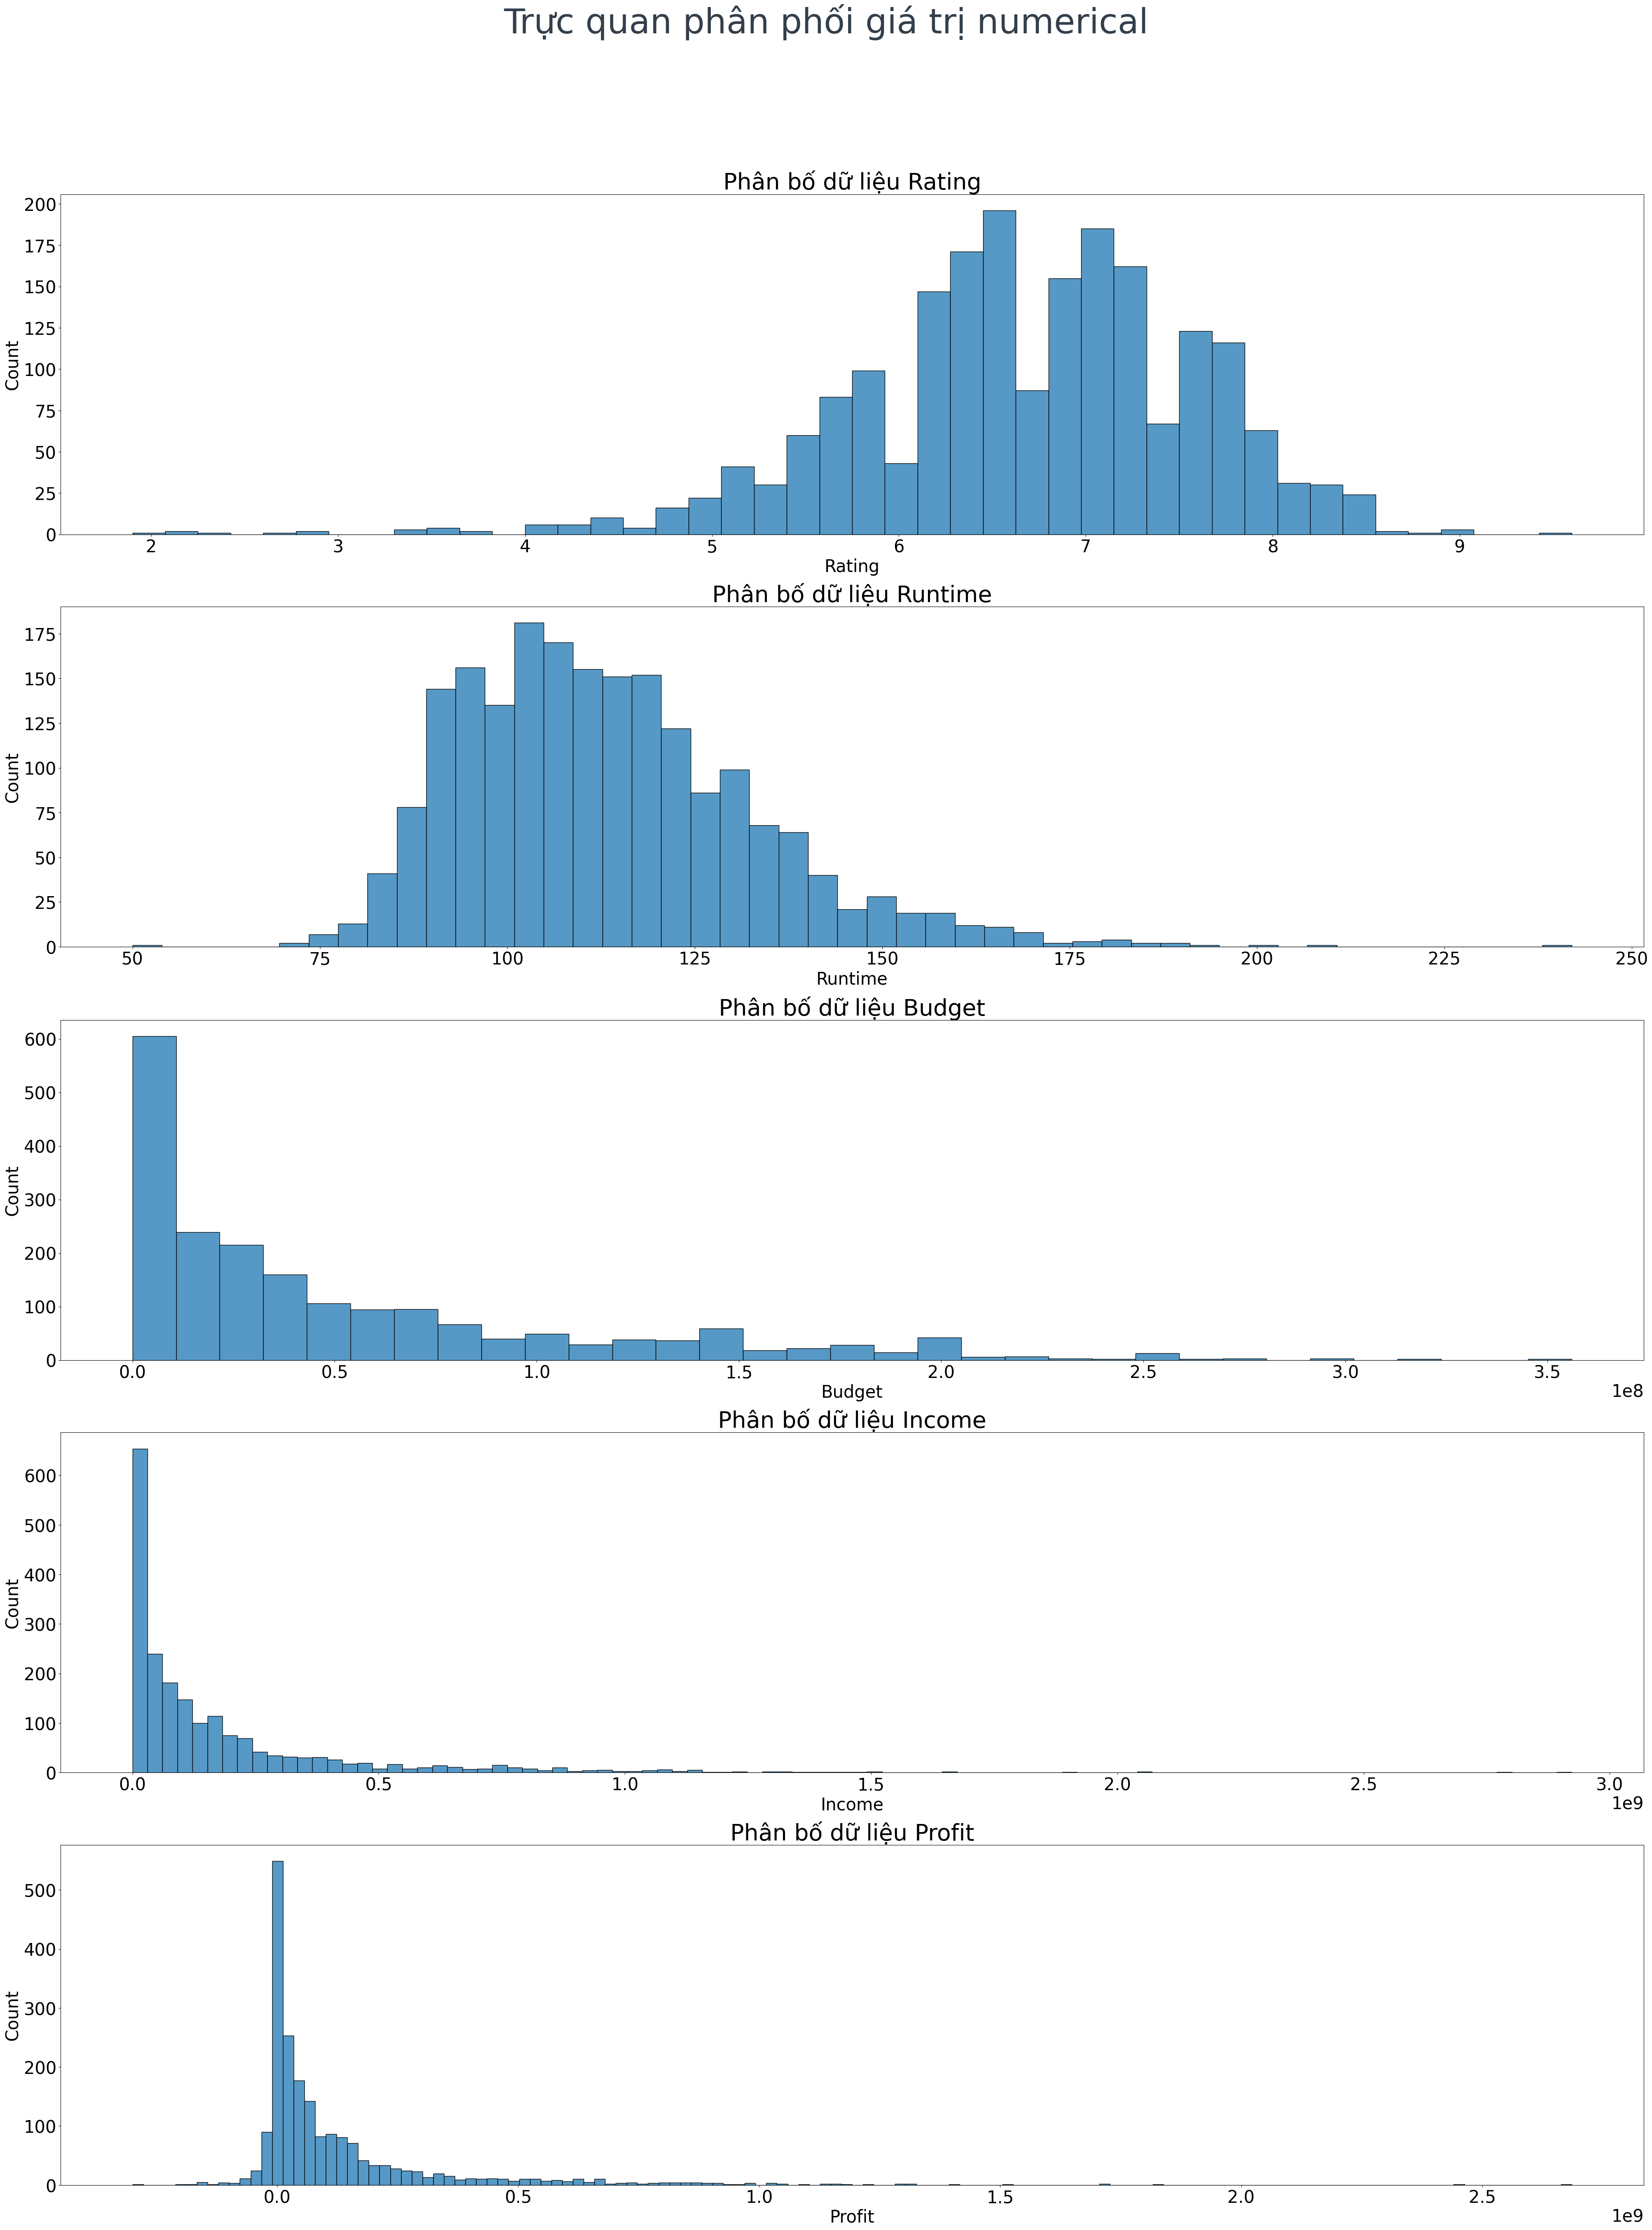

In [28]:
plt.rcParams['figure.figsize'] = 40, 50
fig , axs = plt.subplots(5, 1, constrained_layout = True)

idx = 0
while idx < numerical_df.shape[1]:
    r = idx 
    sns.histplot(x = numerical_df.iloc[:,idx], ax = axs[r])
    axs[r].set_title(f'Phân bố dữ liệu {numerical_df.columns[idx]}', fontsize = 40)
    axs[r].tick_params(axis='both', labelsize=30)
    axs[r].xaxis.get_offset_text().set_fontsize(30)
    axs[r].set_xlabel(str(numerical_df.columns[idx]), fontsize=30)
    axs[r].set_ylabel("Count", fontsize=30)
    idx += 1

plt.suptitle('Trực quan phân phối giá trị numerical', fontsize=60, y=1.08, color = '#333F4B')
plt.show();

**Nhận xét**
- Các trường thuộc tính **`Rating` và `Runtime`** gần với phân phối chuẩn.
- Các trường thuộc tính **`Budget`,`Income` và `Profit`** thì bị lệch phải khá nhiều. Cần phải phân tích thêm.

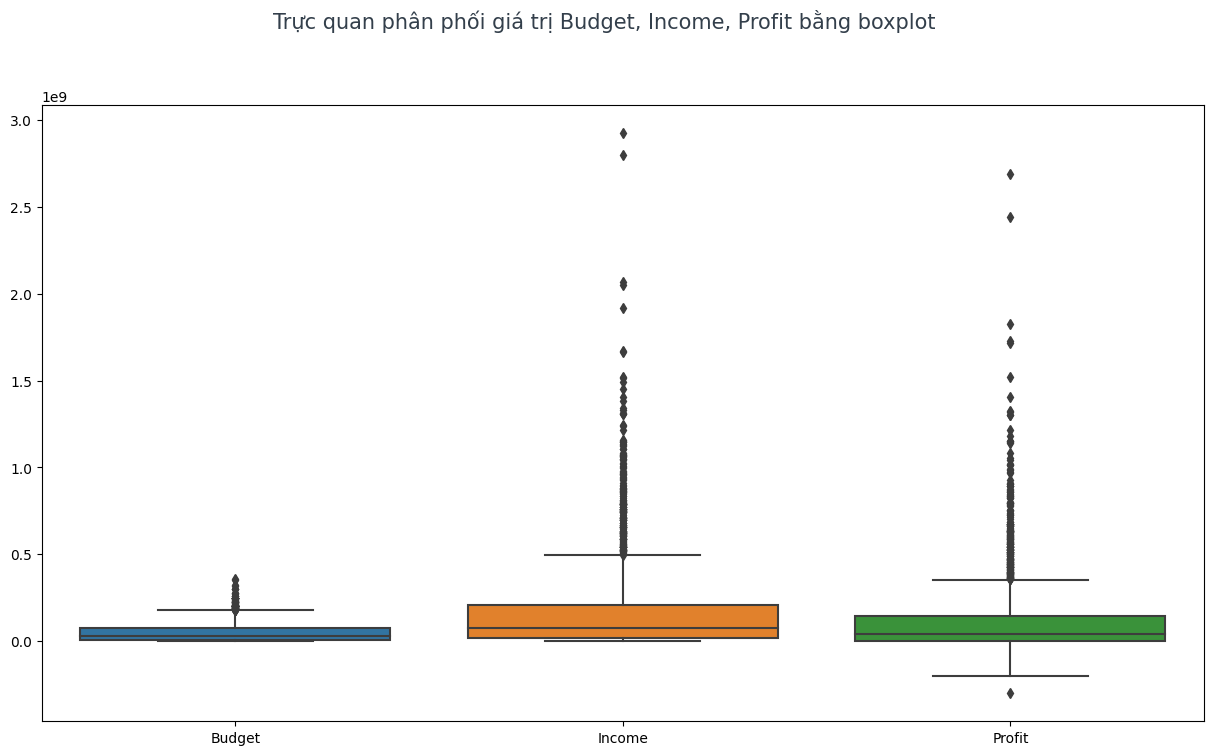

In [29]:
plt.rcParams['figure.figsize'] = 15, 8
sns.boxplot(data=movie_df[['Budget', 'Income', 'Profit']])
plt.suptitle('Trực quan phân phối giá trị Budget, Income, Profit bằng boxplot', 
             fontsize=15, 
             y=1, 
             color = '#333F4B')
plt.show();

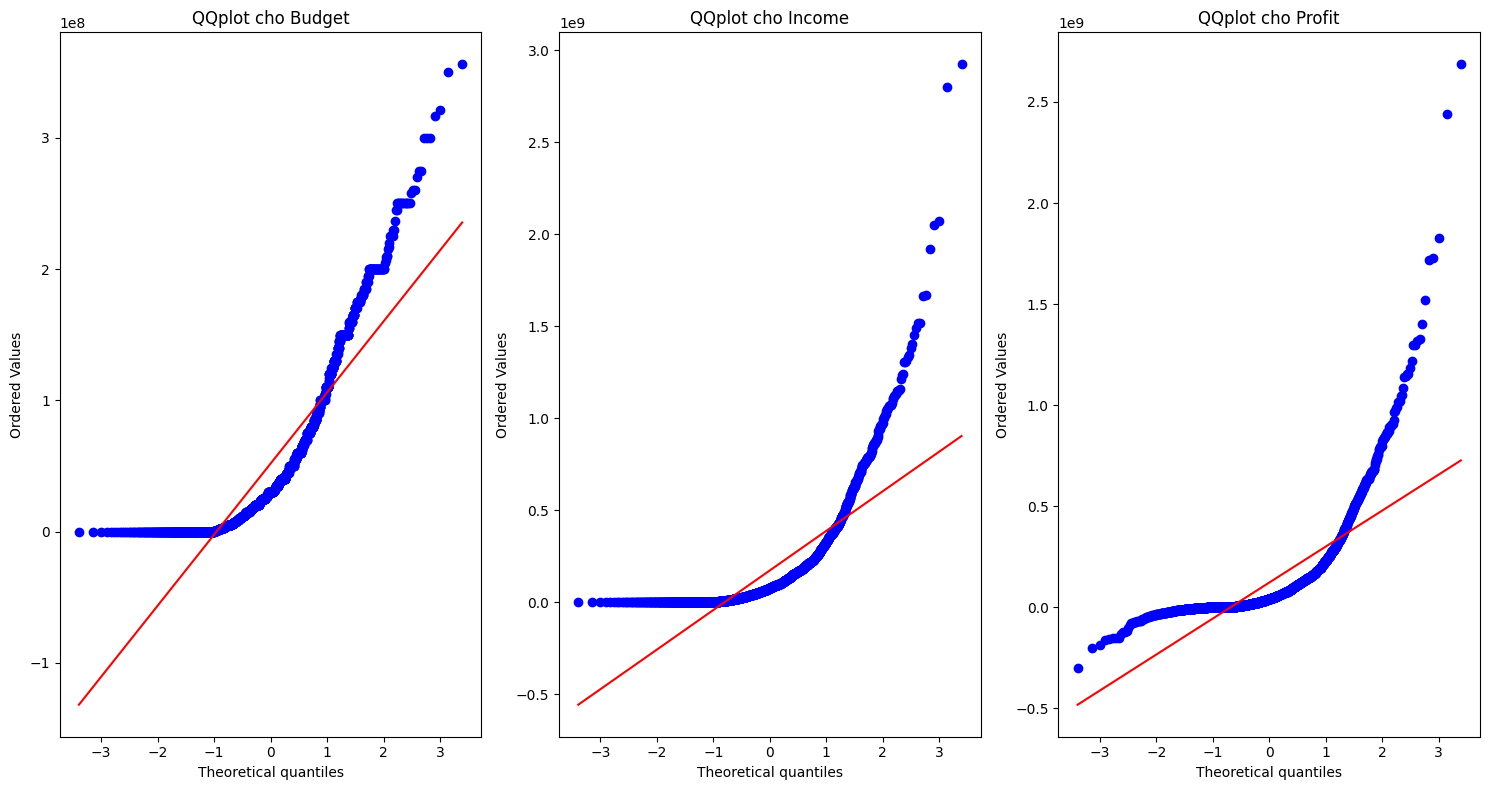

In [30]:
# Tạo subplot 1
plt.subplot(1, 3, 1)
stats.probplot(movie_df['Budget'], plot=plt)
plt.title('QQplot cho Budget')

# Tạo subplot 2
plt.subplot(1, 3, 2)
stats.probplot(movie_df['Income'], plot=plt)
plt.title('QQplot cho Income')

# Tạo subplot 3
plt.subplot(1, 3, 3)
stats.probplot(movie_df['Profit'], plot=plt)
plt.title('QQplot cho Profit')

plt.tight_layout()
plt.show()

Qua 2 biểu đồ trên, ta có thể thấy được:
- Ở Budget ta thấy rằng các gía trị có quantile lớn hơn 75% tập trung vào nhau, không phân bổ quá xa. Phân bố cũng khá gần với phân phối chuẩn (ở QQPlot). Cho nên nhóm sẽ không đặt Budget vào mục cần quan tâm về outlier nữa.
- Nhưng với Income và Profit các giá trị có quantile lớn hơn 75% phân bố cách nhau xa. Và khả năng cao có Outlier.Phân bố so sánh với phân phối chuẩn khác nhau khá nhiều.

Cách tìm outlier có thể dùng các phương pháp như:
- Dựa vào biểu đồ boxplot.
- Sử dụng phương pháp IQR
- Sử dụng phương pháp Z-score
- Sử dụng phương pháp Grubbs

Nhóm sẽ dùng 2 cách để tham khảo kết quả.
1. Lấy các Income hoặc Profit nào lớn hơn quantile 90%
2. Lấy các Income hoặc Profit nào thỏa phương pháp Z-score.
Nếu cách nào tối ưu hơn thì nhóm sẽ loai bỏ outlier bằng cách đó.

In [31]:
# Tính Z-score cho từng giá trị trong các cột
movie_df_z_score_income = (movie_df['Income'] - movie_df['Income'].mean()) / movie_df['Income'].std()
movie_df_z_score_profit = (movie_df['Profit'] - movie_df['Profit'].mean()) / movie_df['Profit'].std()

# Tìm các giá trị ngoại lai trong các cột
outliers_income = movie_df[(movie_df_z_score_income > 3) | (movie_df_z_score_income < -3)]
outliers_profit = movie_df[(movie_df_z_score_profit > 3) | (movie_df_z_score_profit < -3)]

outliers_z_score = pd.concat([outliers_income, outliers_profit]).drop_duplicates()
outliers_z_score.shape

(48, 14)

In [32]:
# Tính quantile trên 90% cho các cột Budget, Income và Profit
quantile_income = movie_df['Income'].quantile(q=0.9)
quantile_profit = movie_df['Profit'].quantile(q=0.9)

# Lấy các giá trị trong từng cột mà có giá trị lớn hơn hoặc bằng giá trị quantile trên 90%
outliers_income = movie_df[movie_df['Income'] >= quantile_income]
outliers_profit = movie_df[movie_df['Profit'] >= quantile_profit]

outliers_quantile = pd.concat([outliers_income, outliers_profit]).drop_duplicates()
outliers_quantile.shape

(213, 14)

Nhóm sẽ sử dụng phương pháp Z-score để loại bỏ outlier

In [33]:
movie_df = movie_df[~movie_df.index.isin(outliers_z_score.index)]
movie_df.shape

(1952, 14)

Kiểm tra lại phân phối của dữ liệu.

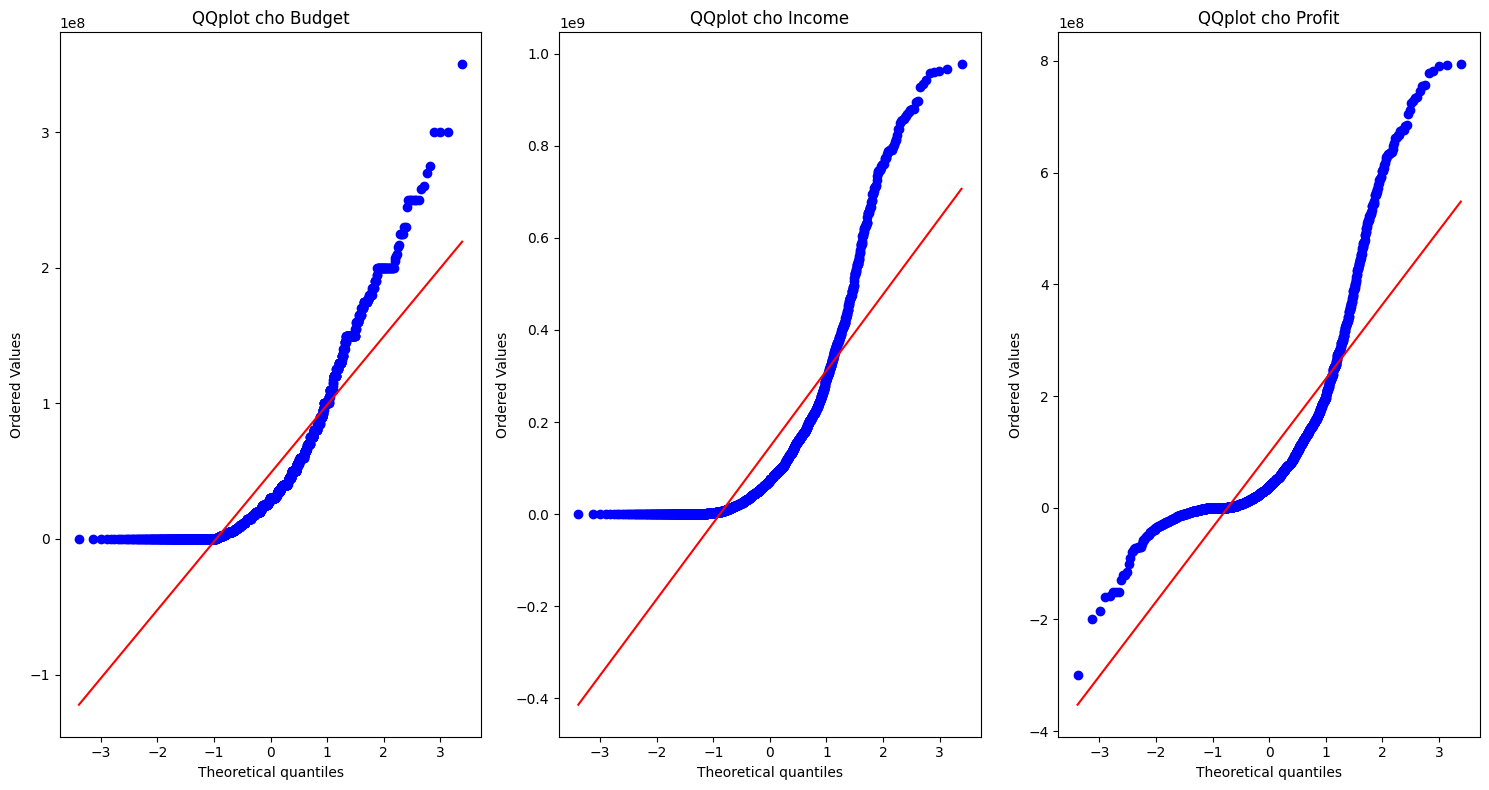

In [35]:
# Tạo subplot 1
plt.subplot(1, 3, 1)
stats.probplot(movie_df['Budget'], plot=plt)
plt.title('QQplot cho Budget')

# Tạo subplot 2
plt.subplot(1, 3, 2)
stats.probplot(movie_df['Income'], plot=plt)
plt.title('QQplot cho Income')

# Tạo subplot 3
plt.subplot(1, 3, 3)
stats.probplot(movie_df['Profit'], plot=plt)
plt.title('QQplot cho Profit')

plt.tight_layout()
plt.show()

Sau khi loại bỏ các outlier thì biểu đồ  QQPlot thể hiện được độ khác nhau giữa phân phối dữ liệu và phân phối chuẩn ít hơn. Đường chéo có độ dốc hơn trước thể hiện rằng phân phối không bị lệch quá nhiều nữa.

**Kiểm tra sự tương quan giữa các cột numerical**

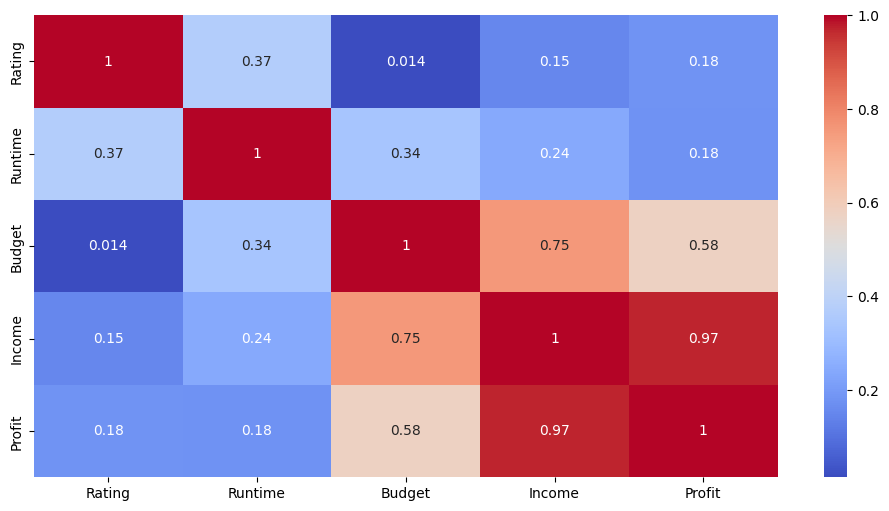

In [50]:
# Tạo ma trận tương quan
corr_matrix = movie_df[['Rating', 'Runtime', 'Budget', 'Income', 'Profit']].corr()

# Vẽ heatmap plot
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**Nhận xét**:
- Các cột `Budget` và `Income` có tương quan cao với nhau (hệ số tương quan là 0.75), cho thấy rằng ngân sách của một bộ phim có thể ảnh hưởng đến doanh thu.
- Cột `Runtime` có tương quan thấp với các cột còn lại, cho thấy rằng độ dài của một bộ phim có thể không ảnh hưởng nhiều đến ngân sách, doanh thu, hoặc lợi nhuận của nó. Tương tự với `Rating`.
- Các cột `Income` và `Profit` có mối tương quan cao với nhau (hệ số tương quan là 0.97), cho thấy rằng doanh thu của một bộ phim có liên quan mật thiết đến lợi nhuận của nó.
- Cột `Budget` có tương quan khá mạnh với cột `Income` (hệ số tương quan là 0.75), nhưng tương quan giữa cột `Budget` và cột `Profit` lại thấp hơn (hệ số tương quan là 0.58). Điều này có thể cho thấy rằng ngân sách của một bộ phim có thể ảnh hưởng đến doanh thu của nó, nhưng không phải lúc nào cũng dẫn đến lợi nhuận cao.

### 3.6 Thống kê dữ liệu categorical

In [36]:
movie_df[['Month', 'Certificate', 'Filming_location']].agg([missing_ratio,pd.Series.unique,pd.Series.nunique])

,Month,Certificate,Filming_location
missing_ratio,0.00,0.00,0.00
unique,"[December, August, November, January, October, March, September, April, July, June, February, May]","[PG-13, PG, R, TV-14, TV-MA, TV-PG, TV-Y7, Not Rated, NC-17, TV-G, Unrated, G]","[New Zealand, USA, Japan, Ireland, United States, Canada, UK, Norway, Greece, Mexico, Spain, Italy, Bulgaria, Australia, Iceland, Belgium, Germany, United Kingdom, Turkey, India, South Africa, Fra..."
nunique,12,12,95


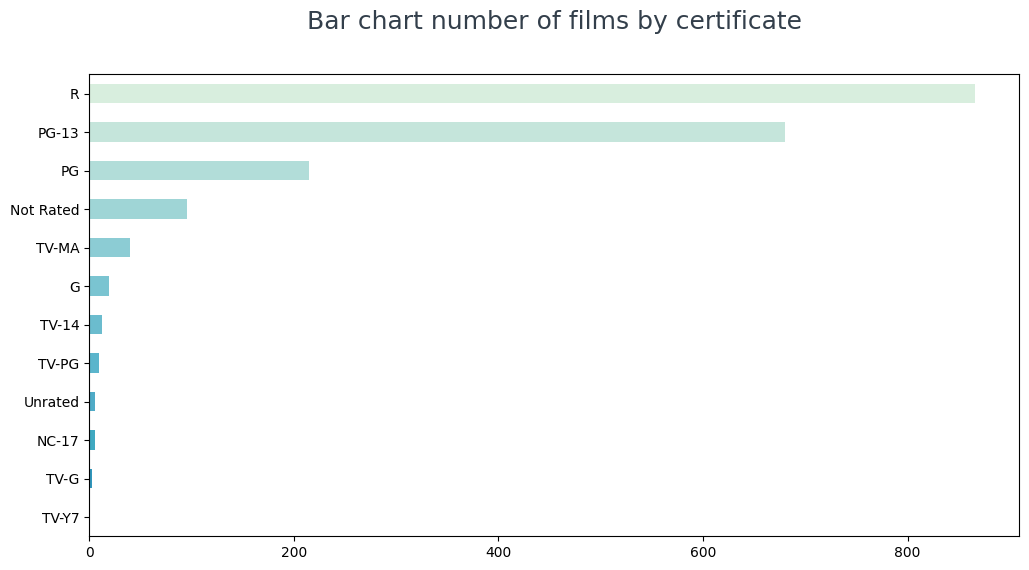

In [56]:
plt.rcParams['figure.figsize'] = 12,6
colors = [
    "#2c7bb6",
    "#3297bc",
    "#3fa9c1",
    "#4fabc7",
    "#5bb5cc",
    "#6bbcce",
    "#7ac4d1",
    "#8cccd4",
    "#9fd5d6",
    "#b2ddd9",
    "#c5e5db",
    "#d8eede"
]
movie_df['Certificate'].value_counts(ascending=True).plot.barh(color=colors)
plt.title('Bar chart number of films by certificate', fontsize=18, y=1.08, color = '#333F4B');

**Nhận xét**
- Đa số các phim có chứng chỉ thuộc về R (trên 17 tuổi) và PG-13 (trên 13 tuổi) với số lượng áp đảo. Tiếp theo sau là PG và Not Rated.

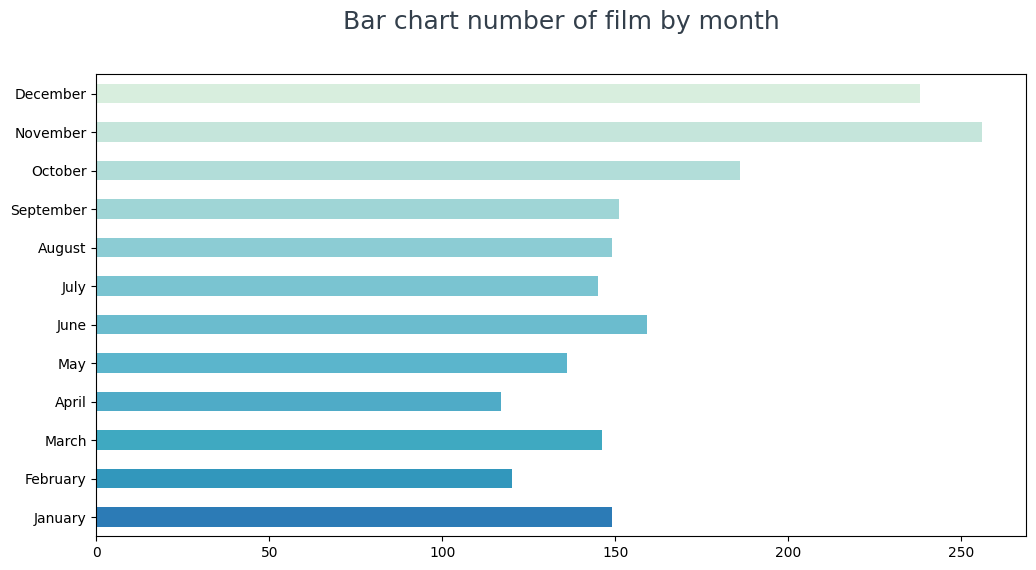

In [57]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
pd.Categorical(movie_df['Month'], categories=month_order, ordered=True).sort_values().value_counts().plot.barh(color=colors)
plt.title('Bar chart number of film by month', fontsize=18, y=1.08, color = '#333F4B');

**Nhận xét**
- Đa số các phim có phát hành vào khoảng thời gian cuối năm từ tháng 10 đến tháng 12. Các tháng còn lại thì chênh lệch không đáng kể với nhau

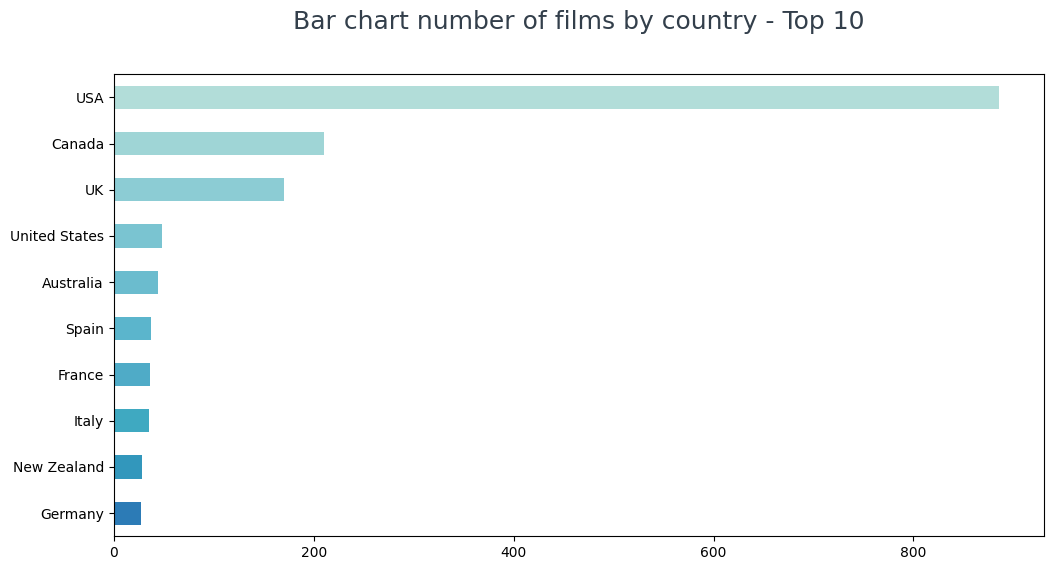

In [58]:
movie_df['Filming_location'].value_counts(ascending=True).tail(10).plot.barh(color=colors[:10])
plt.title('Bar chart number of films by country - Top 10', fontsize=18, y=1.08, color = '#333F4B');

<span style="font-size:18px;font-family: Times New Roman;">**Nhận xét** </span>
- <span style="font-size:17px;font-family: Times New Roman;">Đa số các phim phổ biến ở được quay hình ở USA với số lượng áp đảo. Tiếp theo sau là các nước Canada và UK cũng khá nhiều bộ phim nổi bật hơn so với các quốc gia còn lại.</span>

<span style="font-size:18px;font-family: Times New Roman;">**Tiền xử lý trường thuộc Genre, Directors, Stars, Country_of_origin** </span>  

In [59]:
movie_df['Genre'] = movie_df['Genre'].apply(lambda x: [i.strip() for i in x.split(',')])
movie_df['Directors'] = movie_df['Directors'].apply(lambda x: [i.strip() for i in x.split(',')])
movie_df['Stars'] = movie_df['Stars'].apply(lambda x: [i.strip() for i in x.split(',')])
movie_df['Country_of_origin'] = movie_df['Country_of_origin'].apply(lambda x: [i.strip() for i in x.split(',')])

<span style="font-size:18px;font-family: Times New Roman;">**Thống kê dữ liệu trường thuộc Genre, Directors, Stars, Country_of_origin** </span> 

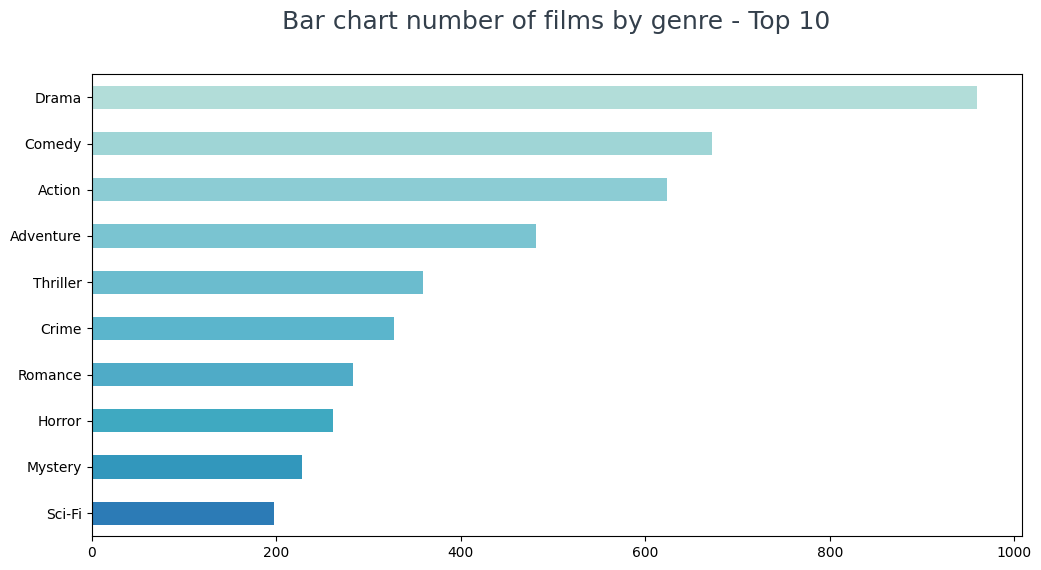

In [61]:
plt.rcParams['figure.figsize'] = 12,6
movie_df.explode('Genre')['Genre'].value_counts(ascending=True).tail(10).plot.barh(color=colors[:10])
plt.title('Bar chart number of films by genre - Top 10', fontsize=18, y=1.08, color = '#333F4B');

<span style="font-size:18px;font-family: Times New Roman;">**Nhận xét** </span>
- <span style="font-size:17px;font-family: Times New Roman;">Trong 10 thể loại phim thì phổ biến nhất là **Drama**, các thể loại phim như **Comedy, Action, Adventure** cũng chiếm số lượng lớn. </span>
- <span style="font-size:17px;font-family: Times New Roman;">Các thể loại còn lại trong danh sách cũng chiếm số lượng tương đối và không chênh lệch nhau đáng kể </span>

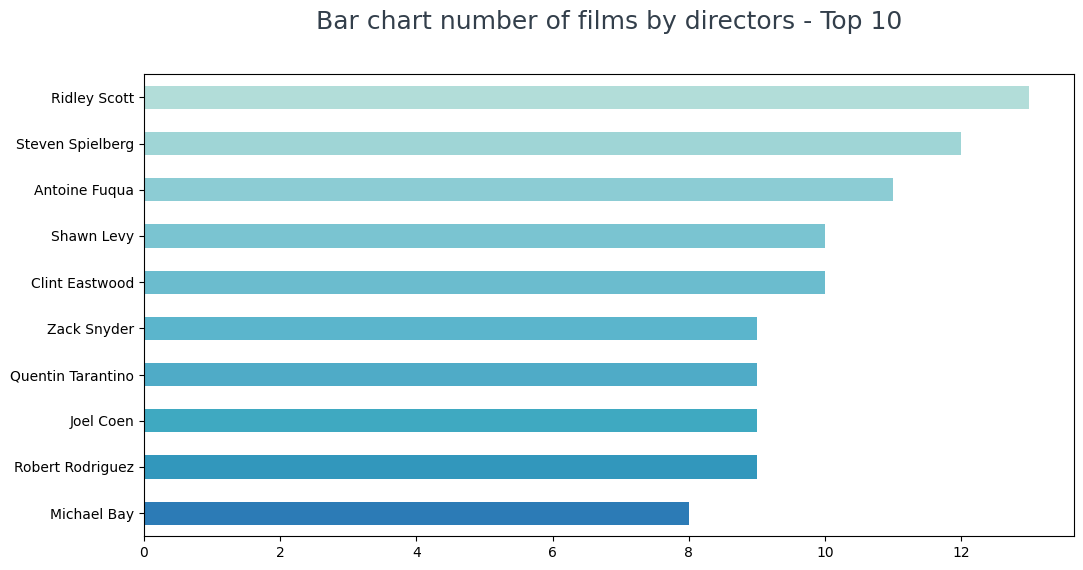

In [62]:
movie_df.explode('Directors')['Directors'].value_counts(ascending=True).tail(10).plot.barh(color=colors[:10])
plt.title('Bar chart number of films by directors - Top 10', fontsize=18, y=1.08, color = '#333F4B');

<span style="font-size:18px;font-family: Times New Roman;">**Nhận xét** </span>
- <span style="font-size:17px;font-family: Times New Roman;">Trong 10 đạo diễn có số lượng phim cao nhất thì nổi bật hơn là đạo diễn **Ridley Scott** </span>

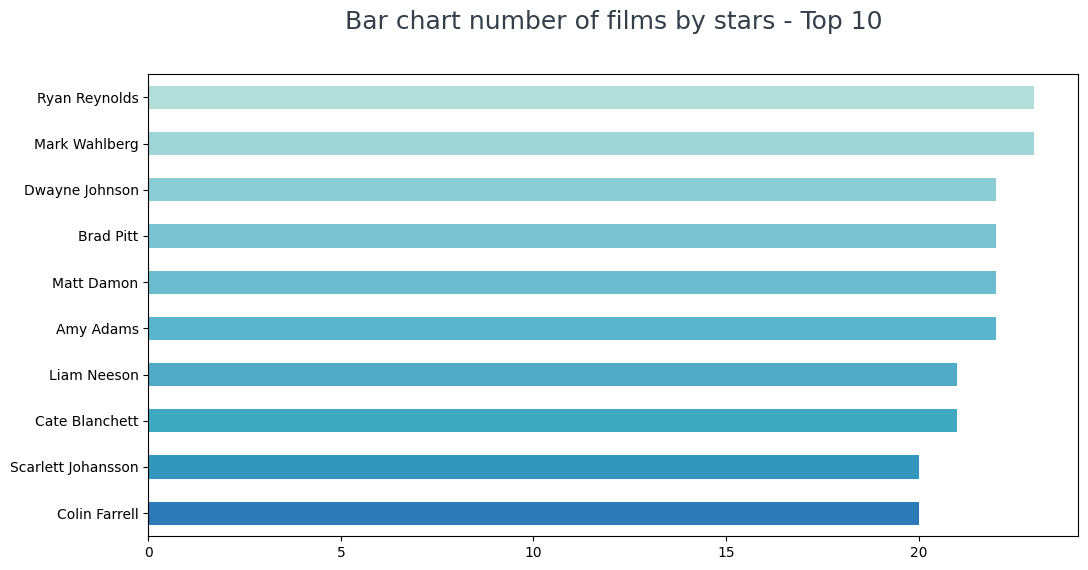

In [63]:
plt.rcParams['figure.figsize'] = 12,6
movie_df.explode('Stars')['Stars'].value_counts(ascending=True).tail(10).plot.barh(color=colors[:10])
plt.title('Bar chart number of films by stars - Top 10', fontsize=18, y=1.08, color = '#333F4B');

<span style="font-size:18px;font-family: Times New Roman;">**Nhận xét** </span>
- <span style="font-size:17px;font-family: Times New Roman;">Trong 10 diễn viên tham gia nhiều phim nhất thì nổi bật hơn là các diễn viên **Dwayne Johnson, Mark Wahlberg, Ryan Reynolds**.</span>
- <span style="font-size:17px;font-family: Times New Roman;">Các diễn viên còn lại trong danh sách có số lượng chênh lệch quá đáng kể so với các diễn viên trên.</span>

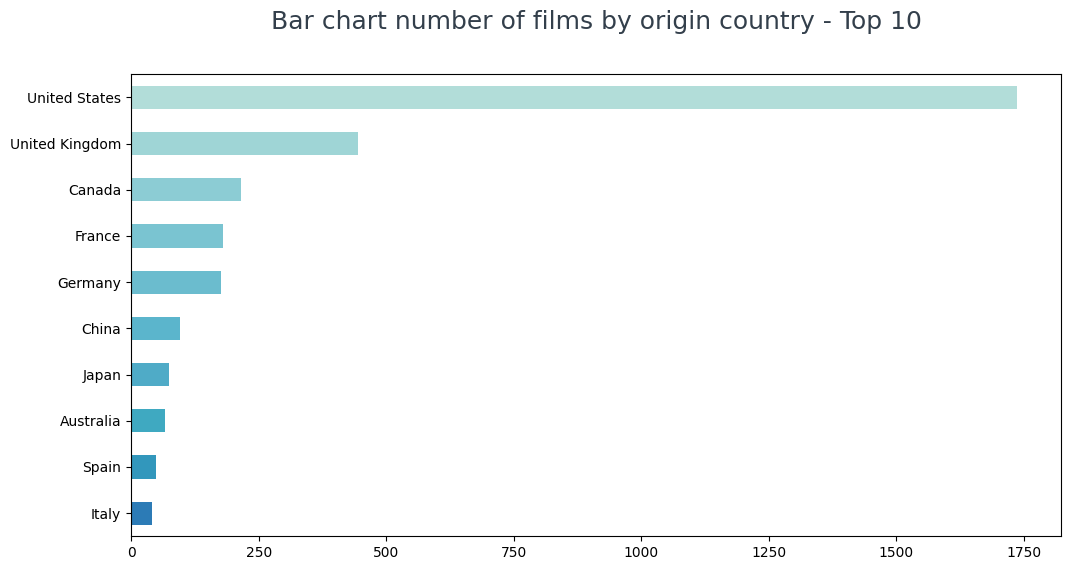

In [64]:
plt.rcParams['figure.figsize'] = 12,6
movie_df.explode('Country_of_origin')['Country_of_origin'].value_counts(ascending=True).tail(10).plot.barh(color=colors[:10])
plt.title('Bar chart number of films by origin country - Top 10', fontsize=18, y=1.08, color = '#333F4B');

<span style="font-size:18px;font-family: Times New Roman;">**Nhận xét** </span>
- <span style="font-size:17px;font-family: Times New Roman;">Trong 10 quốc gia tham gia sản xuất phim thì **USA** lại chiếm số lượng áp đảo. Tiếp theo vẫn là các quốc gia **Canada, UK, France, Germany**.</span>
- <span style="font-size:17px;font-family: Times New Roman;">Các quốc gia còn lại thì số lương chênh nhau không đáng kể nhưng khá thấp so với các quốc gia ở trên.</span>

Qua các thống kê phân bố trên. Nhóm không phát hiện ra điều gì bất thường với dữ liệu categorical.

**Trả lời câu hỏi**

Đây là phần trả lời câu hỏi mang tính hướng giải quyết vấn đề.
+ Ngoài các lỗi xảy ra, hãy trình bày các phương pháp khác nhau để chuẩn bị dữ liệu tốt hơn cho quá trình học máy sau này. Ví dụ, các mô hình học máy cần dữ liệu số, vậy bạn xử lý nó như thế nào?
+ Giả sử một hệ thống học máy gặp vấn đề về thời gian và tài nguyên khi xử lý dữ liệu đó, bạn có thể làm gì trong bước tiền xử lý để làm cho hệ thống khả thi?

Với câu hỏi đầu tiên, nhóm có các cách sau đây:
1. Chuyển đổi dữ liệu thành dạng số: Nhóm sẽ chuyển các dữ liệu categorical sang dạng số bằng các phương pháp one-hot, mã hóa nhị phân, mã hóa số học.
2. Chuẩn hóa dữ liệu: chuyển các giá trị về cùng một đơn vị.
3. Loại bỏ nhiễu
4. Phân tích và chọn đặc trưng: Chọn đặc trưng của bộ dữ liệu để tối đa hiệu suất của quá trình học máy.

Ví dụ nhóm sẽ one-hot các cột `Genre, Directors, Stars, Country_of_origin` vì các cột này chứa giá trị list.

In [105]:
one_hot_genre = pd.get_dummies(movie_df['Genre'].apply(pd.Series).stack()).groupby(level=0).sum().add_prefix('genre_')
one_hot_directors = pd.get_dummies(movie_df['Directors'].apply(pd.Series).stack()).groupby(level=0).sum().add_prefix('directors_')
one_hot_stars = pd.get_dummies(movie_df['Stars'].apply(pd.Series).stack()).groupby(level=0).sum().add_prefix('stars_')
one_hot_country = pd.get_dummies(movie_df['Country_of_origin'].apply(pd.Series).stack()).groupby(level=0).sum().add_prefix('country_of_origin_')

pd.concat([one_hot_genre, one_hot_directors, one_hot_stars, one_hot_country], axis=1)

,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_History,...,country_of_origin_Sweden,country_of_origin_Switzerland,country_of_origin_Taiwan,country_of_origin_Thailand,country_of_origin_Tunisia,country_of_origin_Turkey,country_of_origin_United Arab Emirates,country_of_origin_United Kingdom,country_of_origin_United States,country_of_origin_Uruguay
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1998,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Ở câu hỏi thứ hai, ta có thể có làm các điều sau để cải thiện thời gian và tài nguyên xử lí:
- Giảm số lượng dữ liệu, chỉ lấy một tập ngẫu nhiên để xử lí.
- Loại bỏ các thuộc tính không cần thiết.
- Sử dụng các kĩ thuật mã hóa dữ liệu như one-hot coding, mã hóa đa tầng, mã hóa dựa trên mô hình (model-based encoding)
- Rút trích đặc trưng.
- Sử dụng phương pháp giảm chiều như PCA, LDA, t-SNE